# 1차 Moving Average (MA) 모형

#### Moving Window를 이용하여 window에 나온 시차(lag)만큼 데이터를 추출하여 관계를 설명하는 모형이다 

**MA 모형**은 백색 잡음의 현재 값과 과거 값 중 유한(finite)개의 값에 대한 선형 가중합(linear weighted summation)으로 나타나는 확률 과정을 말한다.

예를 들어 다음과 같이 백색 잡음의 현재 값 $e_t$부터 $q$ 스텝 지연된 $e_{t-q}$까지 $q+1$개 항의 선형 가중합으로 나타나는 경우 **차수 $q$인 MA 모형 (MA model of order $q$)** 혹은 더 간단하게 **$q$차 MA 모형**이라고 한다.

$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$

## MA(1) 모형

1차 MA 모형은 MA(1) 모형이라고 줄여 쓸 수 있다. MA(1) 모형은 다음과 같이 백색 잡음의 현재 값과 1스텝 지연된 과거 값의 합으로 나타난다.
lag(시차) = 1 인 모형이라고 할수 있다 

$$ Y_t = e_t - \theta e_{t-1} $$

MA(1) 모형의 기댓값과 분산은 다음 성질을 만족한다.

$$ \mu = \text{E}[Y_t] = 0 $$

$$ \gamma_0 = \text{Var}[Y_t] = \sigma_e^2 (1 + \theta^2) $$

이 식에서 $\sigma_e^2$는 백색 잡음의 분산이다.

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\text{E}[Y_t] 
&=& \text{E} \left[ e_t - \theta e_{t-1} \right] \\
&=& \text{E} [ e_t ] - \theta \text{E} [ e_{t-1} ] \\
&=& 0 - \theta \cdot 0 \\
&=& 0\\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\text{Var}[Y_t] 
&=& \text{E} \left[ (e_t - \theta e_{t-1})^2 \right] \\
&=& \text{E} [ e_t^2 ] - 2 \theta \text{E} [ e_t e_{t-1} ] + \theta^2 \text{E} [ e_{t-1}^2 ] \\
&=& \sigma_e^2 - 2 \theta \cdot 0 + \theta^2 \sigma_e^2 \\
&=& \sigma_e^2 (1 + \theta^2)  \\
\end{eqnarray}
$$

MA(1) 모형의 자기 공분산은 다음과 같은 성질을 만족한다.

$$ \gamma_1 = \text{Cov}[Y_t, Y_{t-1}] = -\theta \sigma_e^2 $$

$$ \gamma_l = 0 \; \text{ for } l > 1 $$

1개의 lag(시차)이상 차이가나면 Y1(기준시점) 과 Y3의 기준시점의 관계는 아무런 상관이 없다) 

$$
\begin{eqnarray}
\text{Cov}[Y_t, Y_{t-1}]
&=& \text{E} \left[ (e_t - \theta e_{t-1})(e_{t-1} - \theta e_{t-2}) \right] \\
&=& \text{E} [ e_t e_{t-1} ] - \theta \text{E} [ e_t e_{t-2} ] - \theta \text{E} [ e_{t-1}^2 ] + \theta^2 \text{E} [ e_{t-1} e_{t-2} ] \\
&=& 0 - \theta \cdot 0 - \theta \sigma_e^2 + \theta^2 \cdot 0 \\
&=& - \theta \sigma_e^2   \\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\text{Cov}[Y_t, Y_{t-2}]
&=& \text{E} \left[ (e_t - \theta e_{t-1})(e_{t-2} - \theta e_{t-3}) \right] \\
&=& \text{E} [ e_t e_{t-2} ] - \theta \text{E} [ e_t e_{t-3} ] - \theta \text{E} [ e_{t-1} e_{t-2} ] + \theta^2 \text{E} [ e_{t-1} e_{t-3} ] \\
&=& 0 - \theta \cdot 0 - \theta \cdot 0 + \theta^2 \cdot 0 \\
&=& 0  \\
\end{eqnarray}
$$

위 성질에서 MA(1) 모형의 자기 상관계수는 다음 성질을 만족한다.

$$ \rho_1 = - \dfrac{\theta}{1+\theta^2} $$

$$ \rho_k = 0 \; \text{ for } k > 1 $$

이 식을 사용하여 MA(1) 모형의 유일한 계수 $\theta$와 1스텝 지연 자기상관계수의 관계를 그래프로 나타내면 다음과 같다.

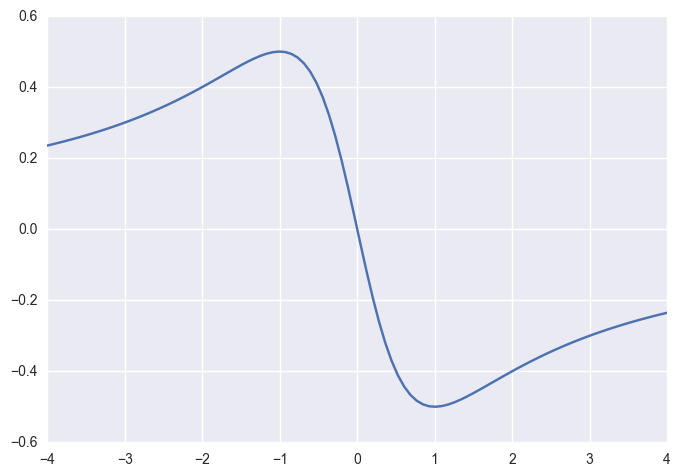

In [1]:
theta = np.linspace(-4, 4, 100)
rho = -theta / (1+theta**2)
plt.plot(theta, rho)
plt.show()

이 그래프에서 자기상관계수의 최대값과 최소값은 $0.5$, $-0.5$이며 이는 각각 $\theta=-1$, $\theta=1$일 때임을 알 수 있다. 즉 모형의 수식이 다음과 같은 경우이다.

$$ Y_t = e_t + e_{t-1} $$

$$ Y_t = e_t - e_{t-1} $$



## 1차 MA 모형의 시뮬레이션

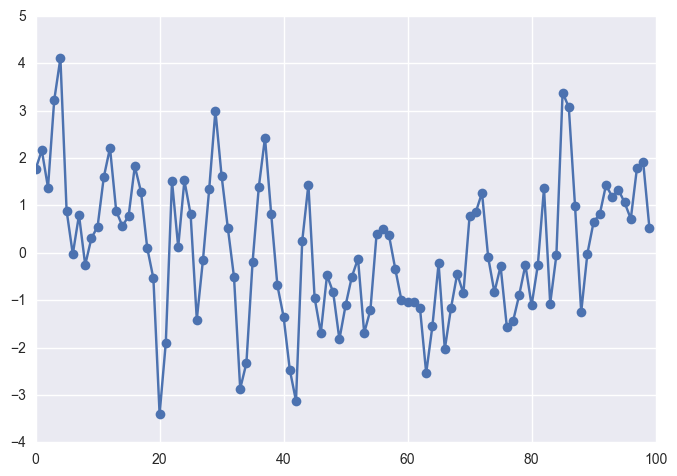

In [1]:
import statsmodels.api as sm
np.random.seed(0)
theta1 = -1
p1 = sm.tsa.ArmaProcess([1], [1, -theta1])
y1 = p1.generate_sample(100)
plt.plot(y1, 'o-')
plt.show()

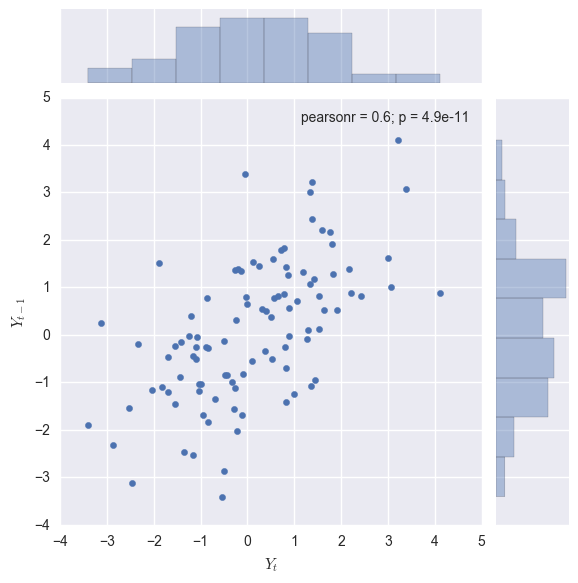

In [2]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
plt.show()
## 차수가 1차수 일때 자기상관계수(autocorrelation 은 0.6으로 상관계수가 있으며 p-value는 4.9e-11 로 0에 가까우므로 상관계수를 믿을만하다 )

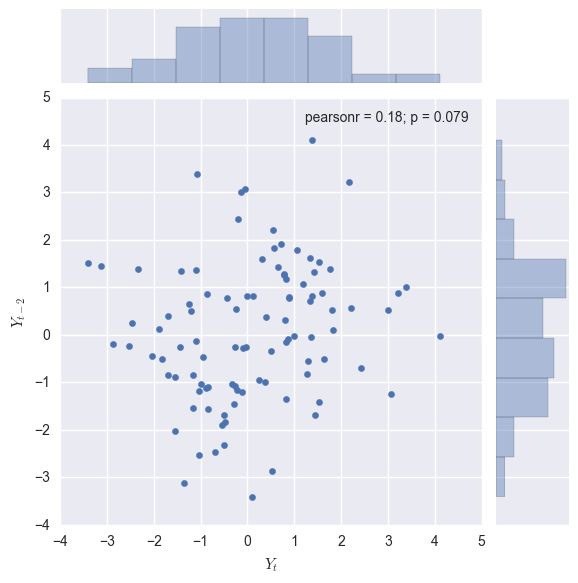

In [3]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
plt.show() 
## 차수가 2차수 일때 자기상관계수(autocorrelation 은 0.18으로 상관계수가 있으며 
## p-value는0.079 로 0에 가까우므로 유의수준 5프로일경우 상관계수를 믿을수 없다)
## p벨류가큼(y와 yt-2시점의 시계열 데이터는 서로 영향을 미치지 않는다 )

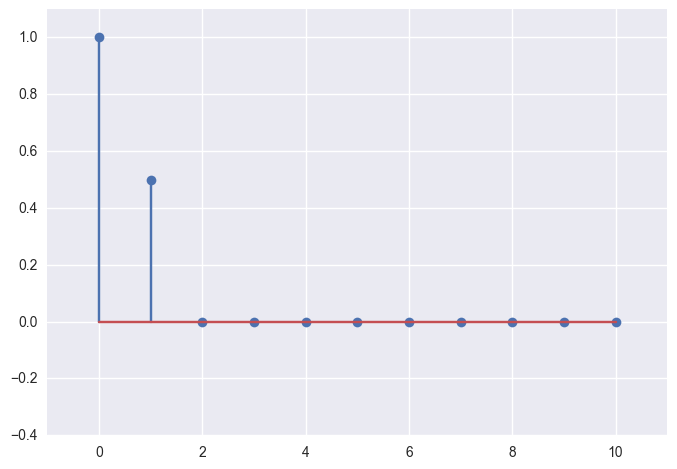

In [4]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.4, 1.1)
plt.show() ## 시점 0에서 상관계수가 1이고(그만큼 관계가 크고) 1일때 상관계수가 0.5 이고 그이상은 0이다 (상관이 없다)


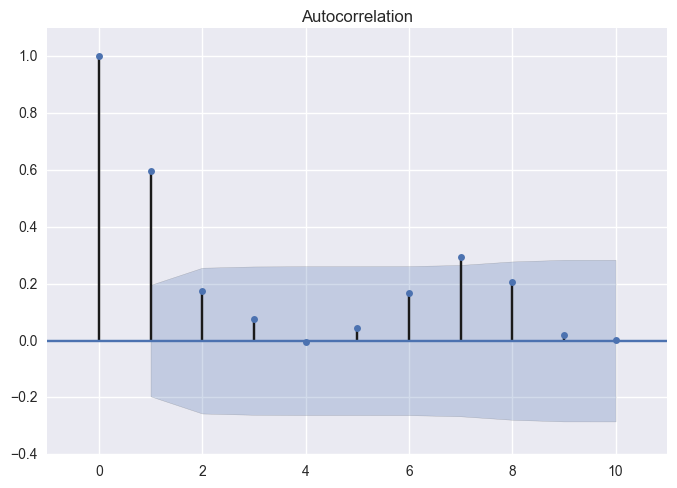

In [5]:
sm.graphics.tsa.plot_acf(y1, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.4, 1.1)
plt.show()

## 하늘색영역은 기각역(critical value)= p value 를 나타낸다 
## 사실상 유의수준 (0.22~-0.22프로의 영역)에 있는 autocorrelation은 믿을만한게 못되므로 그 안에 있는 표는 사실상거의 0에 가깝다 

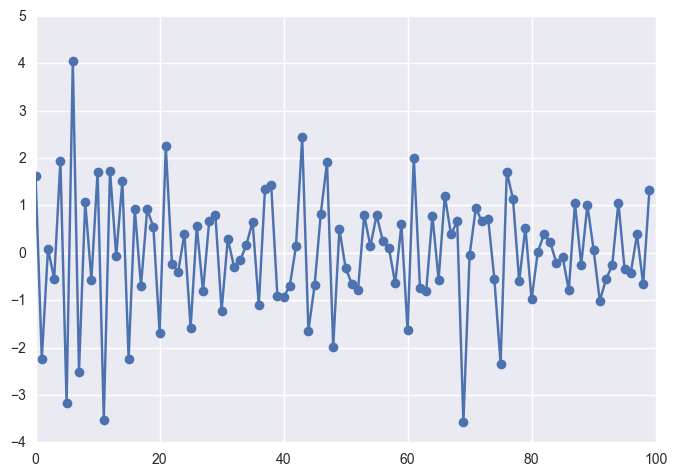

In [6]:
import statsmodels.api as sm
np.random.seed(1)
theta1 = 1
p2 = sm.tsa.ArmaProcess([1], [1, -theta1])
y2 = p2.generate_sample(100)
plt.plot(y2, 'o-')
plt.show() ## 실제값 auto correlation 

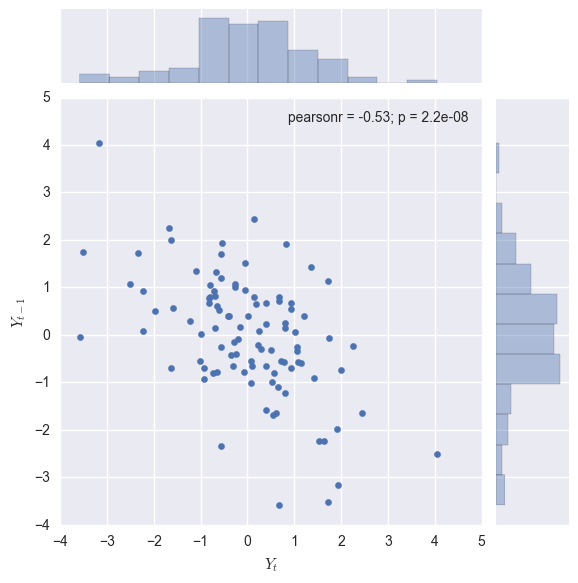

In [7]:
df = pd.DataFrame(np.c_[y2[:-1], y2[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
plt.show()

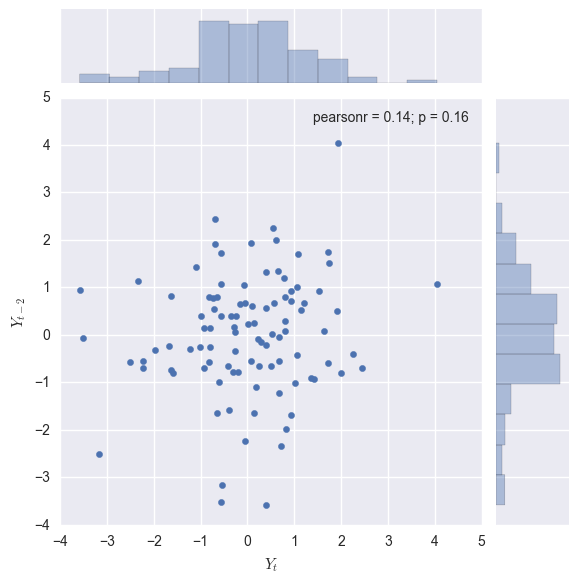

In [8]:
df = pd.DataFrame(np.c_[y2[:-2], y2[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
plt.show()

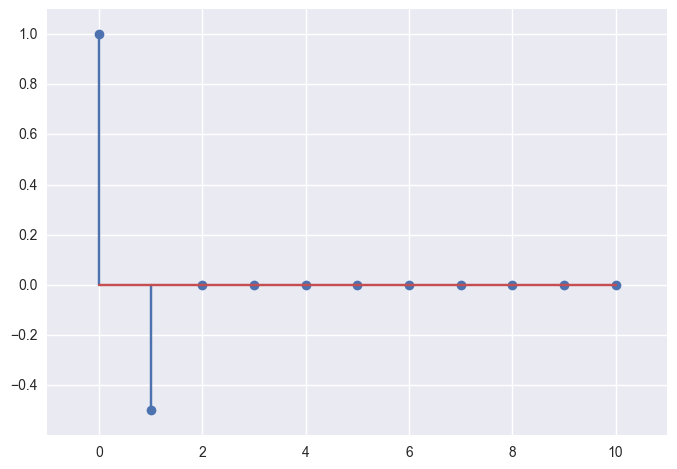

In [9]:
plt.stem(p2.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.6, 1.1)
plt.show()

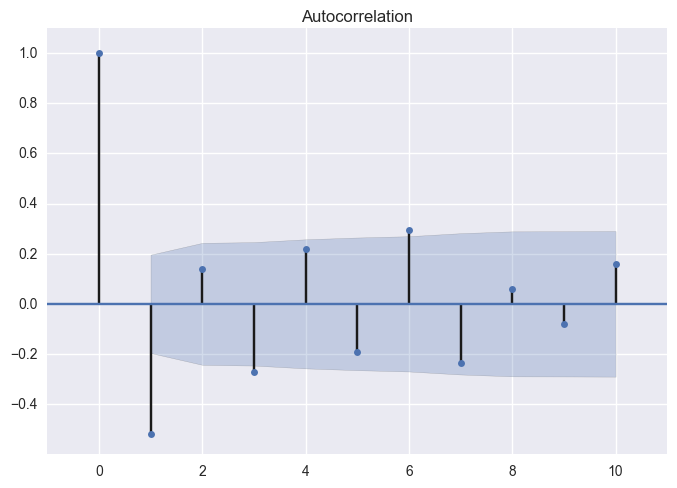

In [10]:
sm.graphics.tsa.plot_acf(y2, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.6, 1.1)
plt.show()